# Contextualization

![](https://github.com/cmcouto-silva/figures/blob/main/ML_diagram_clustering.png?raw=true)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

# Setup

In [ ]:
# !pip install prince
# !pip install kmodes

In [ ]:
# Data wrangling
import re
import glob
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance


## -- Machine learning -- ##
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, minmax_scale, MinMaxScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# import prince                               # factor analysis (including categorical data)
# from kmodes.kmodes import KModes            # clustering categorical data
# from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from sklearn import datasets
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='bright',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

App de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Não adequado para dados com estrutura complexa e não-linear.

Fontes:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


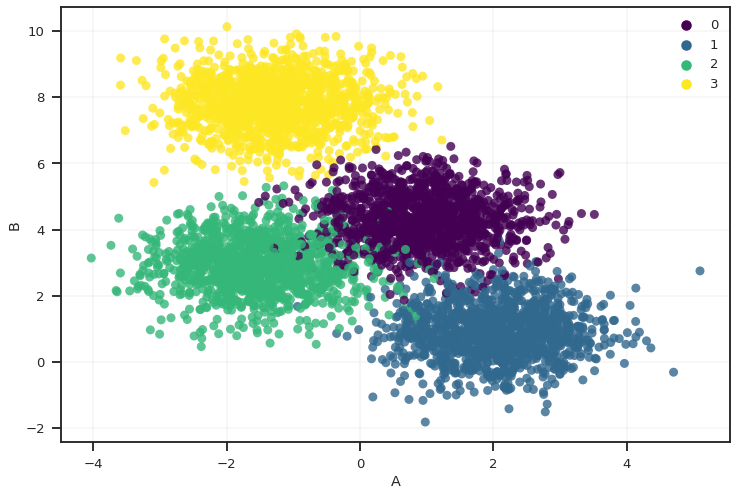

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função
centroids, labels, inertia = k_means(X, n_clusters=4, random_state=2023)

In [ ]:
# Using KMeans
model = KMeans(n_clusters=4, random_state=0)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
intertia = model.inertia_

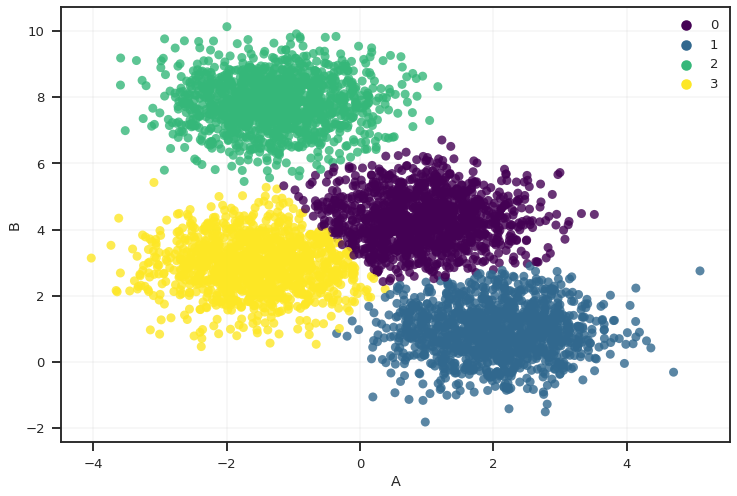

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
model.predict([[-2,0]])

array([3], dtype=int32)

## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- Inércia (WCSS)
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

Exemplo de aplicação:

In [ ]:
silhouette_score(X, labels)
# davies_bouldin_score(X, labels)
# calinski_harabasz_score(X, labels)

0.5782455386404055

Testando distintos agrupamentos:

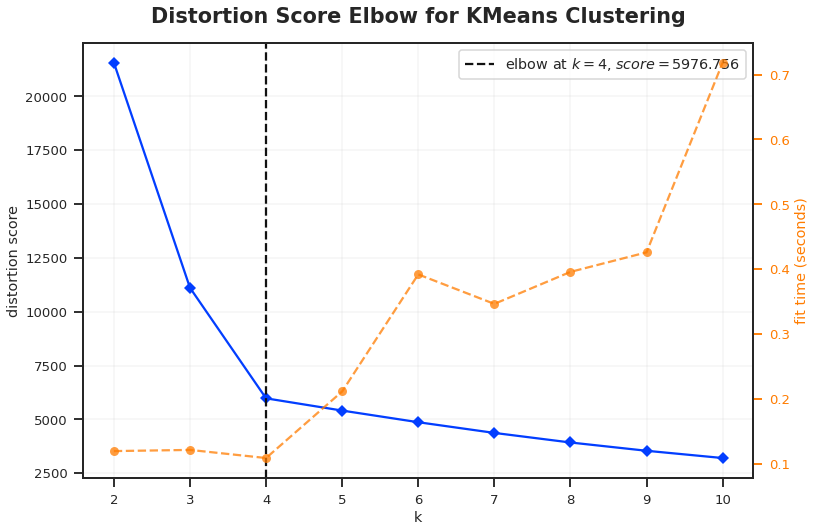

In [ ]:
# Utilizando classe
model = KMeans(random_state=2023)

visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(X)
visualizer.show()

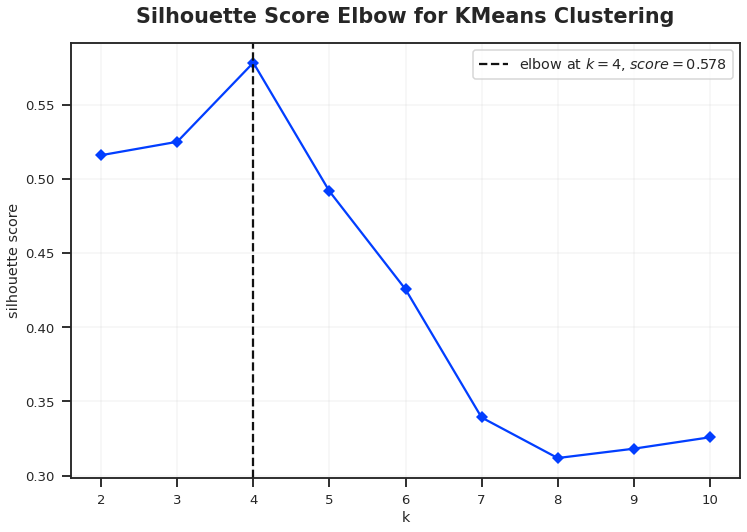

In [ ]:
# Utilizando função
kelbow_visualizer(model, X, k=(2,11), metric='silhouette', timings=False);

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=2023)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [ ]:
cluster_metrics_results

[{'k': 2,
  'inertia': 21560.408251579196,
  'silhouette_score': 0.515911480826198,
  'davies_bouldin_score': 0.6225299776282516,
  'calinski_harabasz_score': 6401.924184343904},
 {'k': 3,
  'inertia': 11109.668736058331,
  'silhouette_score': 0.5249565610896173,
  'davies_bouldin_score': 0.7079347349870065,
  'calinski_harabasz_score': 8561.144307069986},
 {'k': 4,
  'inertia': 5976.755772973111,
  'silhouette_score': 0.5782436399466897,
  'davies_bouldin_score': 0.5860221505365792,
  'calinski_harabasz_score': 12037.097747385484},
 {'k': 5,
  'inertia': 5408.2718588555135,
  'silhouette_score': 0.4916206617486313,
  'davies_bouldin_score': 0.8003338591176368,
  'calinski_harabasz_score': 10106.202405772461},
 {'k': 6,
  'inertia': 4868.071255717303,
  'silhouette_score': 0.4255704782378563,
  'davies_bouldin_score': 0.9753422962141416,
  'calinski_harabasz_score': 9091.751788964222},
 {'k': 7,
  'inertia': 4371.723535002425,
  'silhouette_score': 0.33919266040840323,
  'davies_bouldi

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,21560.408252,0.515911,0.622530,6401.924184
3,11109.668736,0.524957,0.707935,8561.144307
4,5976.755773,0.578244,0.586022,12037.097747
5,5408.271859,0.491621,0.800334,10106.202406
6,4868.071256,0.425570,0.975342,9091.751789
7,4371.723535,0.339193,1.120087,8529.662021
8,3926.813346,0.311882,1.169162,8217.981664
9,3542.270250,0.318171,1.081378,8037.848803
10,3205.048056,0.325863,1.013735,7952.838613


In [ ]:
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k').style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,21560.408252,0.515911,0.622530,6401.924184
3,11109.668736,0.524957,0.707935,8561.144307
4,5976.755773,0.578244,0.586022,12037.097747
5,5408.271859,0.491621,0.800334,10106.202406
6,4868.071256,0.425570,0.975342,9091.751789
7,4371.723535,0.339193,1.120087,8529.662021
8,3926.813346,0.311882,1.169162,8217.981664
9,3542.270250,0.318171,1.081378,8037.848803
10,3205.048056,0.325863,1.013735,7952.838613


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
X_random = np.random.rand(*X.shape)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

,inertia,silhouette_score,davies_bouldin_score
k,,,
2,521.094090,-0.000273,152.288013
3,328.951333,-0.006144,99.837608
4,211.657427,-0.014210,70.594044
5,178.704816,-0.016986,102.765215
6,149.684607,-0.022958,117.025978
7,127.146687,-0.023784,186.276000
8,105.675481,-0.026940,181.282478
9,91.616625,-0.027814,121.962198
10,83.759306,-0.028370,94.454959


Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

## High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(df_dim.shape[1])])
display(df_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215
...,...,...,...,...,...,...,...,...,...,...
995,-6.590360,3.422836,6.599212,-1.688134,0.281325,0.597289,0.406577,0.046039,0.643861,-0.928400
996,-7.330300,3.541334,4.587332,0.810124,1.054155,-1.566163,-0.340734,-0.499334,-1.155100,-0.353791
997,-6.411780,5.056657,5.401471,0.665292,0.160854,-0.069270,-0.404070,0.207449,0.184674,0.605232
998,-9.947851,-4.739351,-3.272195,0.732262,-0.496340,-0.558349,-0.108244,0.305074,-0.048046,-0.388834


In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.55329463, 0.86083646, 0.96928936, 0.97418833, 0.97895301,
       0.98346233, 0.98785112, 0.99213323, 0.99621909, 1.        ])

In [ ]:
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
).style.format('{:.2%}')

,explained_var,explained_var_cumsum
PC1,55.33%,55.33%
PC2,30.75%,86.08%
PC3,10.85%,96.93%
PC4,0.49%,97.42%
PC5,0.48%,97.90%
PC6,0.45%,98.35%
PC7,0.44%,98.79%
PC8,0.43%,99.21%
PC9,0.41%,99.62%
PC10,0.38%,100.00%


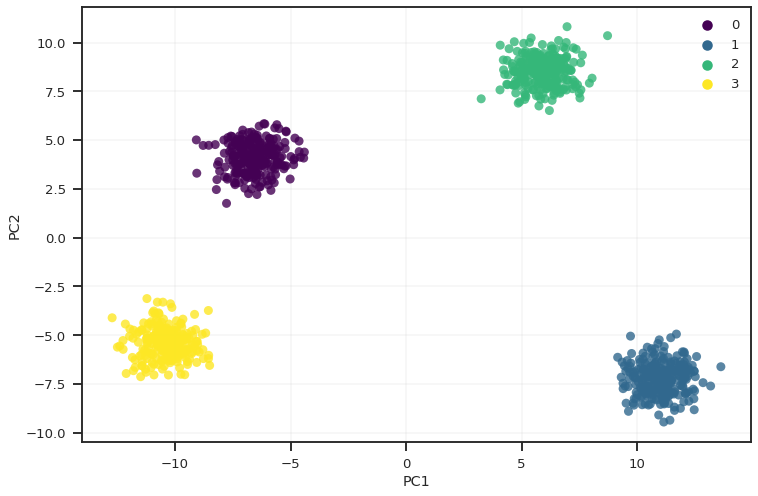

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs)

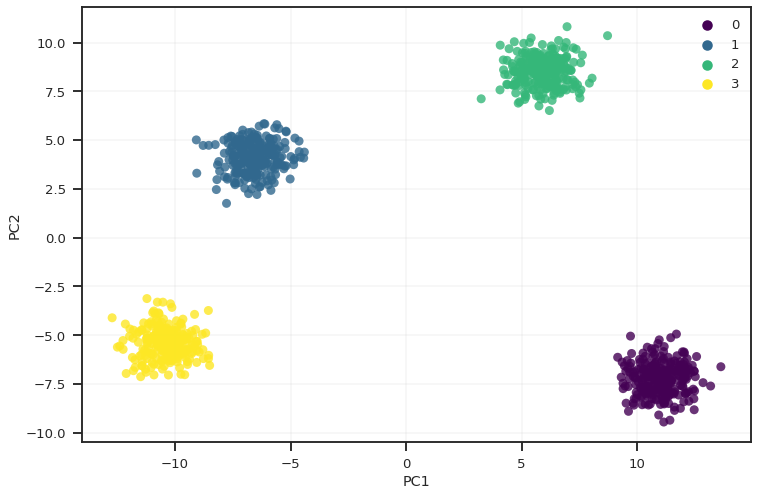

In [ ]:
labels = k_means(df_pca, 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=labels, **scatter_kwargs)

In [ ]:
px.scatter_3d(data_frame=df_pca, x='PC1', y='PC2', z='PC3', color=labels.astype(str), template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Sensível ao método e métrica de distância selecionados
- Dendograma fica com visualização inviável para muitas amostras
 

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.864189,8.266859
1,-0.020383,1.839675
2,-1.114917,8.343485
3,2.427797,-0.331331
4,-1.288313,3.978991


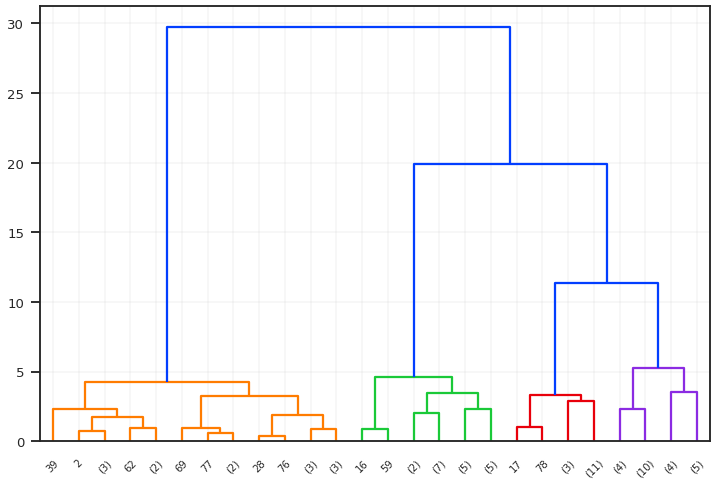

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10, p=4, truncate_mode='level')
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 4, 1, 2, 4, 4, 2, 4, 1, 2, 1, 4, 2, 3, 1, 4, 2, 3, 4, 3, 2, 4,
       4, 2, 4, 1, 1, 4, 1, 1, 1, 4, 3, 4, 4, 4, 4, 3, 2, 1, 2, 2, 3, 4,
       1, 2, 3, 2, 4, 1, 2, 3, 3, 4, 3, 4, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2,
       2, 3, 4, 1, 2, 2, 1, 4, 4, 3, 1, 1, 3, 2], dtype=int32)

In [ ]:
# Using scikit-learn
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit_predict(X)

array([1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 3, 1, 0, 2, 3, 0, 3, 2, 0,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 2, 1, 2, 2, 3, 0,
       1, 2, 3, 2, 0, 1, 2, 3, 3, 0, 3, 0, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2,
       2, 3, 0, 1, 2, 2, 1, 0, 0, 3, 1, 1, 3, 2])

# Meanshift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


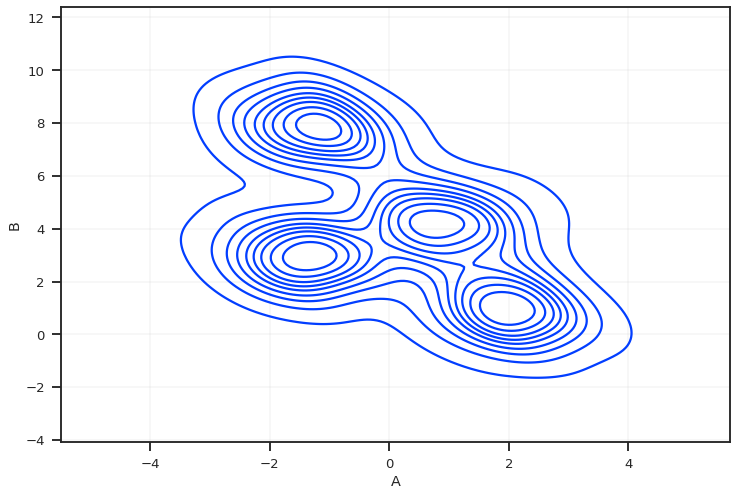

In [ ]:
# Density plot
sns.kdeplot(data=df, x='A', y='B');

In [ ]:
# Model & labels
model = MeanShift()
labels = model.fit_predict(X)

In [ ]:
# Estimating bandwidth
estimate_bandwidth(X)

2.822735629625506

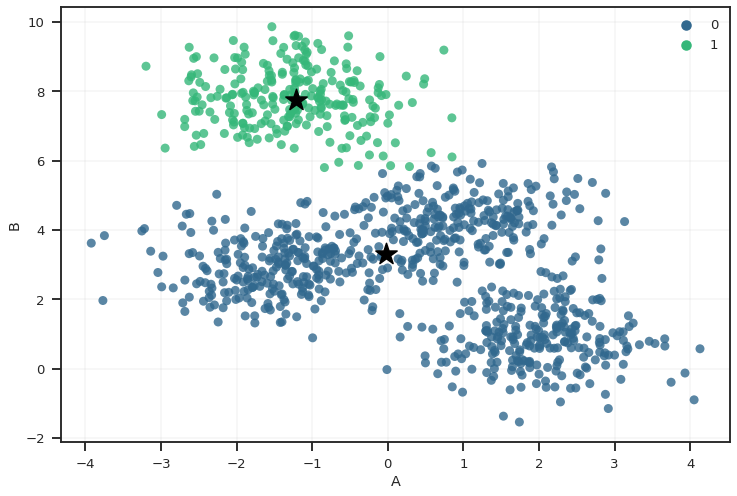

In [ ]:
# Plot
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

In [ ]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

# DBSCAN

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [ ]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [ ]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

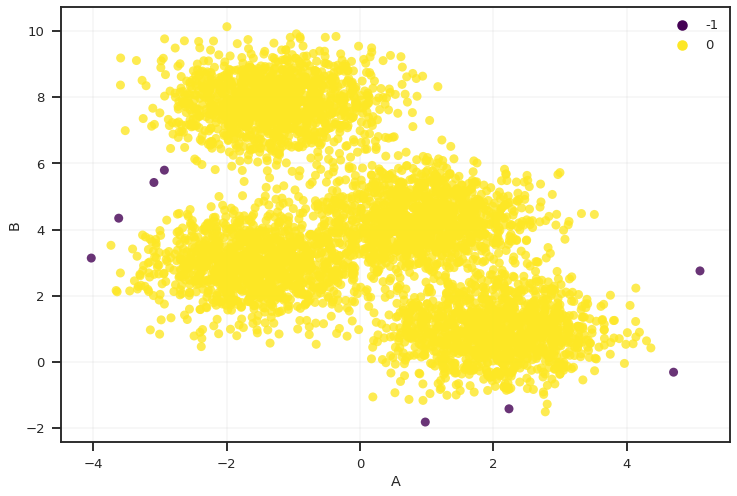

In [ ]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

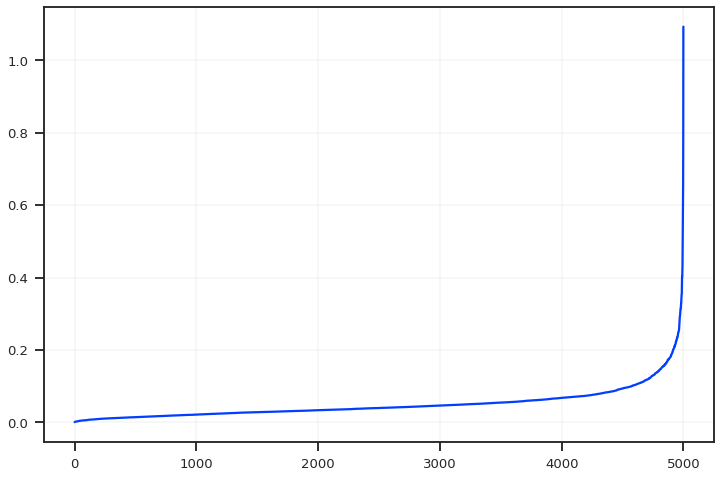

In [ ]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

# GMM

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [ ]:
# Create model
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [ ]:
# Model attributes
model.means_
model.covariances_
model.weights_

array([0.24989313, 0.24971796, 0.24923426, 0.25115465])

In [ ]:
# Predict labels
model.predict(X)[:5]

array([0, 3, 0, 2, 1])

In [ ]:
# Predict probability
model.predict_proba(X)[:5].round(2)

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.98],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ]])

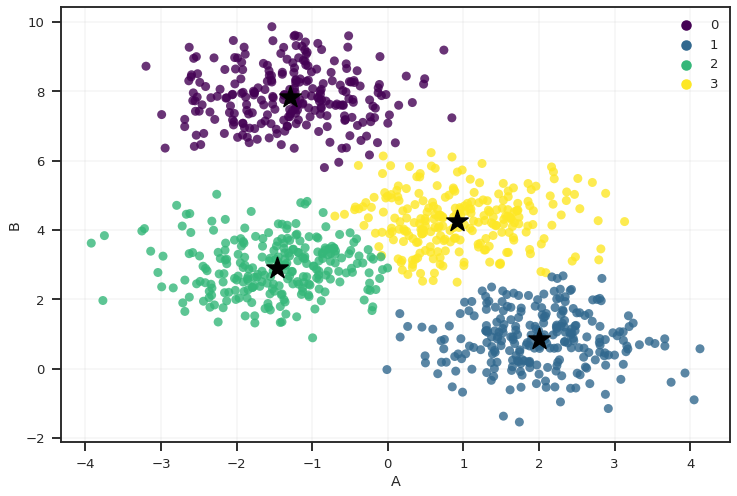

In [ ]:
# Plot
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [ ]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(2,11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,7976.527656,2,full
1,8165.511057,2,tied
2,8050.082533,2,diag
3,8036.917677,2,spherical
4,7526.397339,3,full
5,7736.189981,3,tied
6,7656.896132,3,diag
7,7666.905826,3,spherical
8,7475.928562,4,full
9,7419.260030,4,tied


In [ ]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
9,7419.260030,4,tied
11,7426.425803,4,spherical
13,7440.164407,5,tied
10,7450.139988,4,diag
15,7455.591810,5,spherical


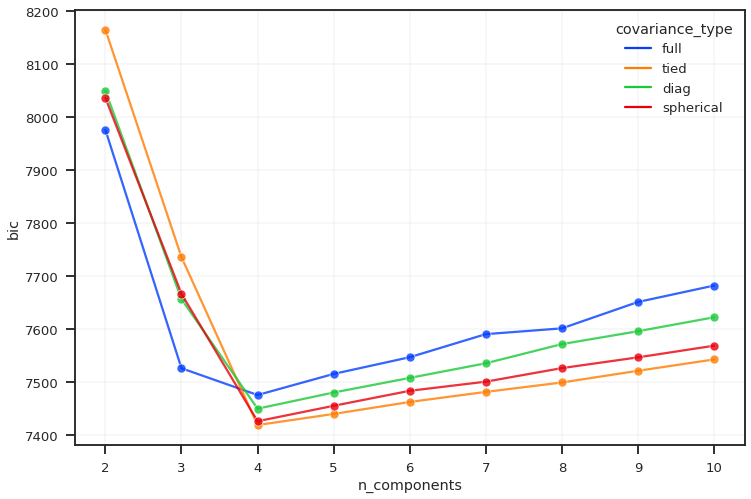

In [ ]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type', marker='o', alpha=.8);

# WorldCup Case

## Load dataset

In [ ]:
# Download and unzip files
!wget https://github.com/cmcouto-silva/datasets/raw/main/datasets/fifa-football-world-cup-dataset.zip
!unzip fifa-football-world-cup-dataset.zip

--2023-01-08 05:50:25--  https://github.com/cmcouto-silva/datasets/raw/main/datasets/fifa-football-world-cup-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/fifa-football-world-cup-dataset.zip [following]
--2023-01-08 05:50:25--  https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/fifa-football-world-cup-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13531 (13K) [application/zip]
Saving to: ‘fifa-football-world-cup-dataset.zip’

fifa-football-world 100%[===================>]  13.21K  --.-KB/s    in 0s      

2023-01

In [ ]:
# Listando arquivos com
files = glob.glob(r'FIFA - [1-2]*')

In [ ]:
def read_csv_custom(file):
  df = pd.read_csv(file)
  df['Year'] = int(re.search('\d+', file).group())
  return df

In [ ]:
df_teams = pd.concat([read_csv_custom(file) for file in files])
df_teams = df_teams.sort_values(['Year','Position'])
display(df_teams)

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Year
0,1,Uruguay,4,4,0,0,15,3,12,8,1930
1,2,Argentina,5,4,0,1,18,9,9,8,1930
2,3,United States,3,2,0,1,7,6,1,4,1930
3,4,Yugoslavia,3,2,0,1,7,7,0,4,1930
4,5,Chile,3,2,0,1,5,3,2,4,1930
...,...,...,...,...,...,...,...,...,...,...,...
27,28,Costa Rica,3,0,1,2,2,5,−3,1,2018
28,29,Iceland,3,0,1,2,2,5,−3,1,2018
29,30,Morocco,3,0,1,2,2,4,−2,1,2018
30,31,Egypt,3,0,0,3,2,6,−4,0,2018


## Prepare data

Adicionando novas colunas para que os dados fiquem comparáveis:

In [ ]:
df_teams = (
  df_teams
 .assign(**{
     'Win %': lambda x: x['Win'] / x['Games Played'],
     'Draw %': lambda x: x['Draw'] / x['Games Played'],
     'Loss %': lambda x: x['Loss'] / x['Games Played'],
     'Avg Goals For': lambda x: x['Goals For'] / x['Games Played'],
     'Avg Goals Against': lambda x: x['Goals Against'] / x['Games Played'],
 })
)

df_teams['Rank'] = df_teams.groupby('Year')['Position'].transform(lambda x: 1 - minmax_scale(x))
display(df_teams)

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Year,Win %,Draw %,Loss %,Avg Goals For,Avg Goals Against,Rank
0,1,Uruguay,4,4,0,0,15,3,12,8,1930,1.000000,0.000000,0.000000,3.750000,0.750000,1.000000
1,2,Argentina,5,4,0,1,18,9,9,8,1930,0.800000,0.000000,0.200000,3.600000,1.800000,0.916667
2,3,United States,3,2,0,1,7,6,1,4,1930,0.666667,0.000000,0.333333,2.333333,2.000000,0.833333
3,4,Yugoslavia,3,2,0,1,7,7,0,4,1930,0.666667,0.000000,0.333333,2.333333,2.333333,0.750000
4,5,Chile,3,2,0,1,5,3,2,4,1930,0.666667,0.000000,0.333333,1.666667,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,Costa Rica,3,0,1,2,2,5,−3,1,2018,0.000000,0.333333,0.666667,0.666667,1.666667,0.129032
28,29,Iceland,3,0,1,2,2,5,−3,1,2018,0.000000,0.333333,0.666667,0.666667,1.666667,0.096774
29,30,Morocco,3,0,1,2,2,4,−2,1,2018,0.000000,0.333333,0.666667,0.666667,1.333333,0.064516
30,31,Egypt,3,0,0,3,2,6,−4,0,2018,0.000000,0.000000,1.000000,0.666667,2.000000,0.032258


Agrupando os dados por time, considerando apeans aquelas com mais de 3 copas:

In [ ]:
df_teams_stats = df_teams.groupby(['Team']).agg(
  n_cups = ('Team', 'count'),
  avg_wins = ('Win %', 'mean'),
  avg_draws = ('Draw %', 'mean'),
  avg_losses = ('Loss %', 'mean'),
  avg_goals_for = ('Avg Goals For', 'mean'),
  avg_goals_against = ('Avg Goals Against', 'mean'),
  avg_rank = ('Rank', 'mean')
)

df_teams_stats = df_teams_stats.query('n_cups > 3')
display(df_teams_stats)

,n_cups,avg_wins,avg_draws,avg_losses,avg_goals_for,avg_goals_against,avg_rank
Team,,,,,,,
Algeria,4,0.229167,0.229167,0.541667,0.937500,1.437500,0.318724
Argentina,17,0.481653,0.173950,0.344398,1.670588,1.322269,0.699798
Australia,5,0.116667,0.250000,0.633333,0.783333,1.966667,0.246022
Austria,7,0.361905,0.171429,0.466667,1.378571,1.611905,0.511454
Belgium,13,0.302015,0.191209,0.506777,1.356410,1.924359,0.494288
Brazil,21,0.626871,0.145805,0.227324,2.073016,1.079138,0.803850
Bulgaria,6,0.071429,0.329365,0.599206,0.599206,2.011905,0.292941
Cameroon,7,0.133333,0.333333,0.533333,0.723810,1.876190,0.253657
Chile,9,0.296296,0.222222,0.481481,1.166667,1.509259,0.494966


Verificando outliers:

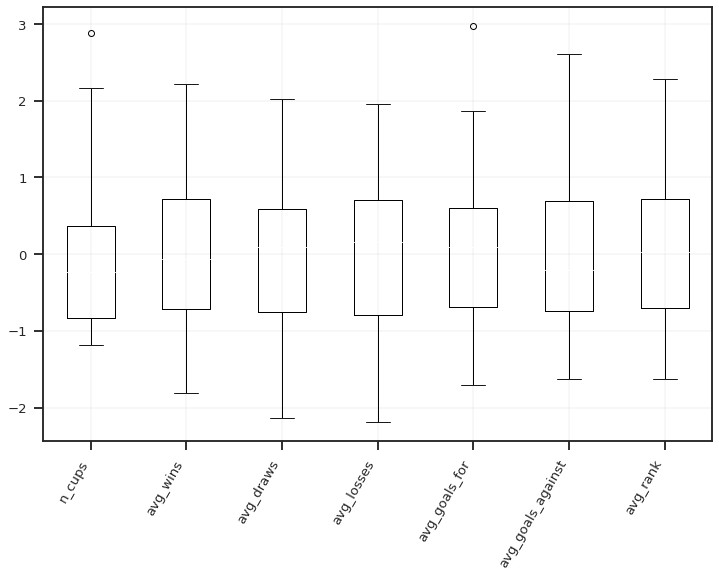

In [ ]:
df_teams_stats.apply(scale).boxplot()
plt.xticks(rotation=60, ha='right')
plt.show()

Limitando outliers para no máximo 3 desvios padrões:

In [ ]:
for col in df_teams_stats.columns:
  avg,std = df_teams_stats[col].agg(['mean','std'])
  df_teams_stats[col] = df_teams_stats[col].clip(lower=avg-3*std, upper=avg+3*std)

Normalizando valores para para uma mesma escala (menor valor será -1 e maior 1):

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

X = df_teams_stats.copy()
X[:] = scaler.fit_transform(X)

print('Scaled dataset')
display(X.head())

print('\nDataset stats')
display(X.describe())

Scaled dataset


,n_cups,avg_wins,avg_draws,avg_losses,avg_goals_for,avg_goals_against,avg_rank
Team,,,,,,,
Algeria,-1.000000,-0.432027,0.124881,0.371158,-0.655463,-0.414571,-0.684617
Argentina,0.529412,0.477108,-0.329910,-0.412321,0.091155,-0.567985,0.463290
Australia,-0.882353,-0.837110,0.296473,0.735225,-0.812475,0.289941,-0.903618
Austria,-0.647059,0.045928,-0.350674,0.073286,-0.206251,-0.182375,-0.104057
Belgium,0.058824,-0.169721,-0.187756,0.232588,-0.228821,0.233614,-0.155766



Dataset stats


,n_cups,avg_wins,avg_draws,avg_losses,avg_goals_for,avg_goals_against,avg_rank
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,-0.417237,-0.103023,0.025020,0.056418,-0.268521,-0.233616,-0.166546
std,0.497119,0.502087,0.486581,0.489534,0.432345,0.477895,0.517398
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.823529,-0.457532,-0.340292,-0.328823,-0.561574,-0.583760,-0.526944
50%,-0.529412,-0.134109,0.067684,0.130024,-0.228821,-0.328455,-0.153722
75%,-0.235294,0.253766,0.310200,0.398739,-0.012108,0.094495,0.199024
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

### Clusterização hierárquica

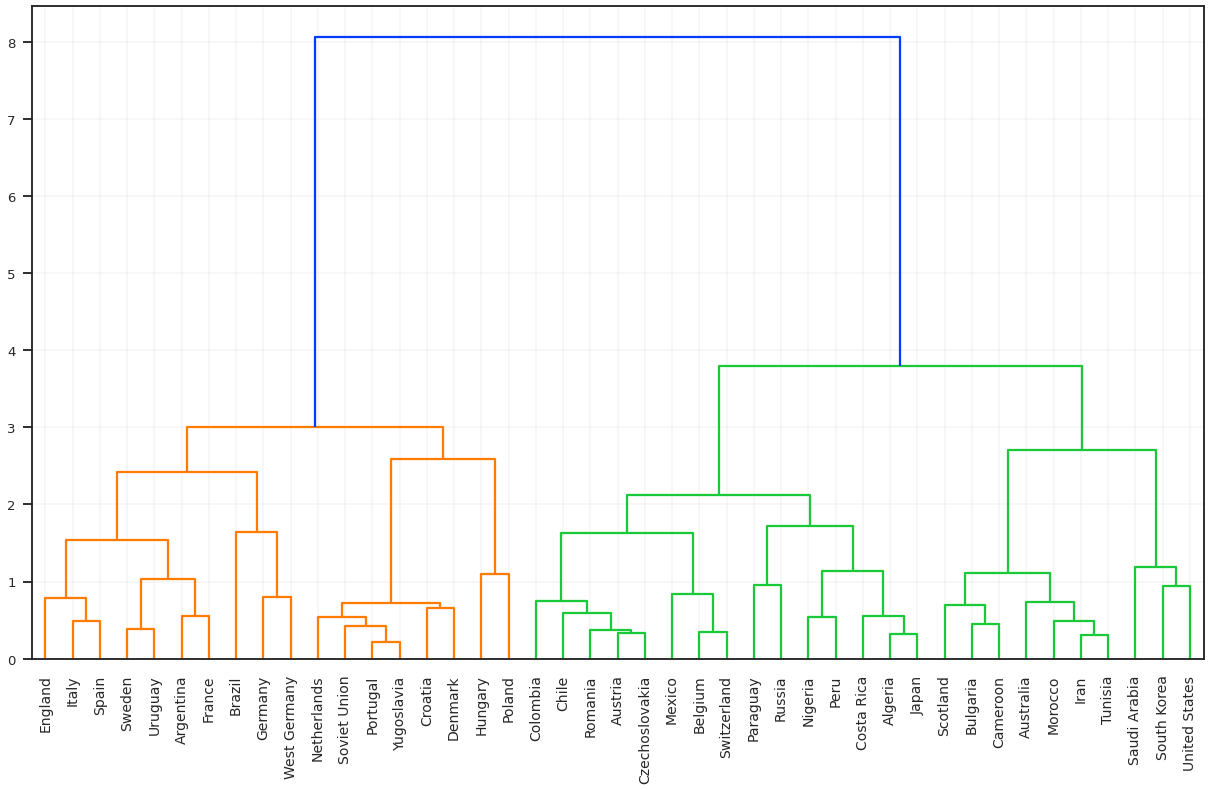

In [ ]:
plt.figure(figsize=(21,12))
Z = linkage(X, method='ward')
dendrogram_dict = dendrogram(Z, labels=X.index)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
@interact(metric=['distortion','silhouette','calinski_harabasz'])
def kplot(metric):
  kelbow_visualizer(AgglomerativeClustering(), X, timings=False, metric=metric)
  plt.show()

interactive(children=(Dropdown(description='metric', options=('distortion', 'silhouette', 'calinski_harabasz')…

In [ ]:
labels = fcluster(Z, 3, criterion='maxclust')

(
  df_teams_stats.assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='Reds', axis=1)
)

cluster,1,2,3
n_cups,11.333333,7.666667,6.600000
avg_wins,0.454063,0.281492,0.138762
avg_draws,0.198561,0.212052,0.257794
avg_losses,0.347376,0.506455,0.603444
avg_goals_for,1.684505,1.210072,0.817730
avg_goals_against,1.312465,1.624584,1.966381
avg_rank,0.656229,0.440333,0.268338


In [ ]:
df_teams_stats.assign(cluster=labels)

,n_cups,avg_wins,avg_draws,avg_losses,avg_goals_for,avg_goals_against,avg_rank,cluster
Team,,,,,,,,
Algeria,4,0.229167,0.229167,0.541667,0.937500,1.437500,0.318724,2
Argentina,17,0.481653,0.173950,0.344398,1.670588,1.322269,0.699798,1
Australia,5,0.116667,0.250000,0.633333,0.783333,1.966667,0.246022,3
Austria,7,0.361905,0.171429,0.466667,1.378571,1.611905,0.511454,2
Belgium,13,0.302015,0.191209,0.506777,1.356410,1.924359,0.494288,2
Brazil,21,0.626871,0.145805,0.227324,2.073016,1.079138,0.803850,1
Bulgaria,6,0.071429,0.329365,0.599206,0.599206,2.011905,0.292941,3
Cameroon,7,0.133333,0.333333,0.533333,0.723810,1.876190,0.253657,3
Chile,9,0.296296,0.222222,0.481481,1.166667,1.509259,0.494966,2


### K-Means

In [ ]:
@interact(metric=['distortion','silhouette','calinski_harabasz'])
def kplot(metric):
  kelbow_visualizer(KMeans(), X, timings=False, metric=metric)
  plt.show()

interactive(children=(Dropdown(description='metric', options=('distortion', 'silhouette', 'calinski_harabasz')…

In [ ]:
cluster_metrics_results = []
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Blues')

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.368980,0.993267,35.907706
3,0.257579,1.228334,26.588649
4,0.214824,1.370638,22.682177
5,0.229907,1.213146,20.994163
6,0.241293,0.997507,20.683770
7,0.267706,0.963538,21.098088
8,0.274891,1.090488,21.464240
9,0.283312,0.984589,21.081693
10,0.289108,0.872702,21.048308


In [ ]:
model = KMeans(n_clusters=3, random_state=2023)
labels = model.fit_predict(X)

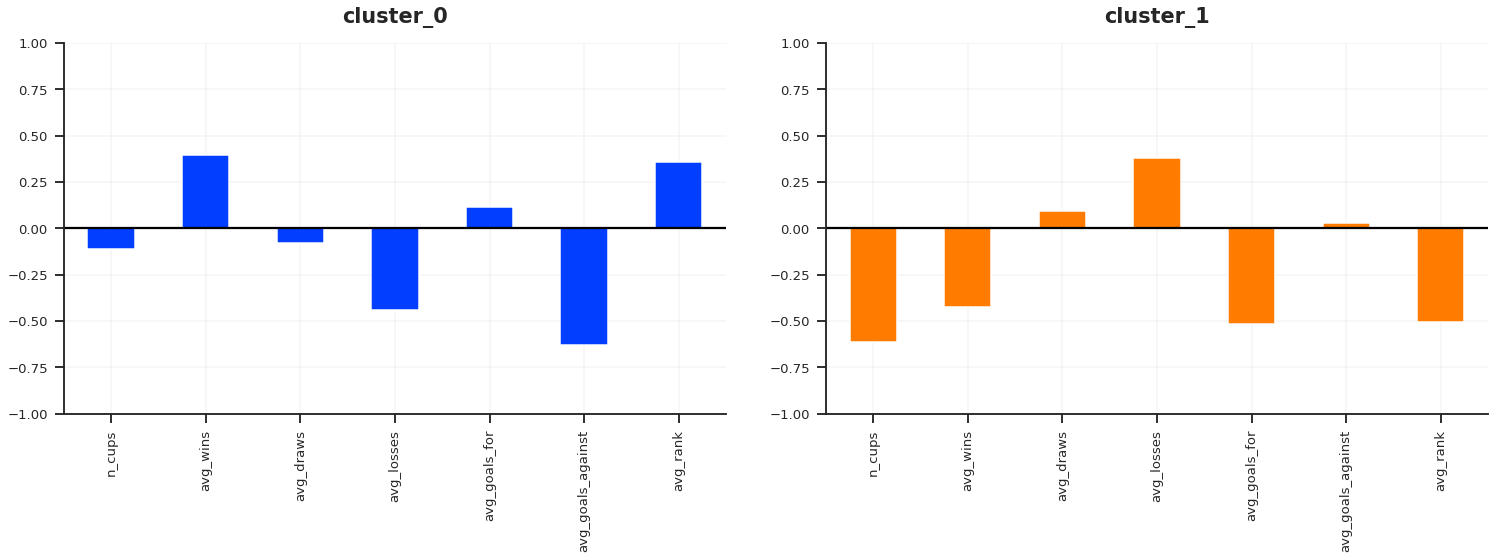

In [ ]:
# Treinando modelo e capturando clusters
model = KMeans(n_clusters=2, random_state=2023)
labels = model.fit_predict(X)

# Interpretando cluster via centroides
axes = (
  pd.DataFrame(model.cluster_centers_, columns=X.columns)
  .T
 .add_prefix('cluster_')
 .plot.bar(subplots=True, legend=False, ylim=(-1,1), figsize=(21,8), layout=(1,2))
)

for ax in axes[0]:
  ax.axhline(y=0, color='black')

plt.tight_layout(w_pad=3)
sns.despine()
plt.show()

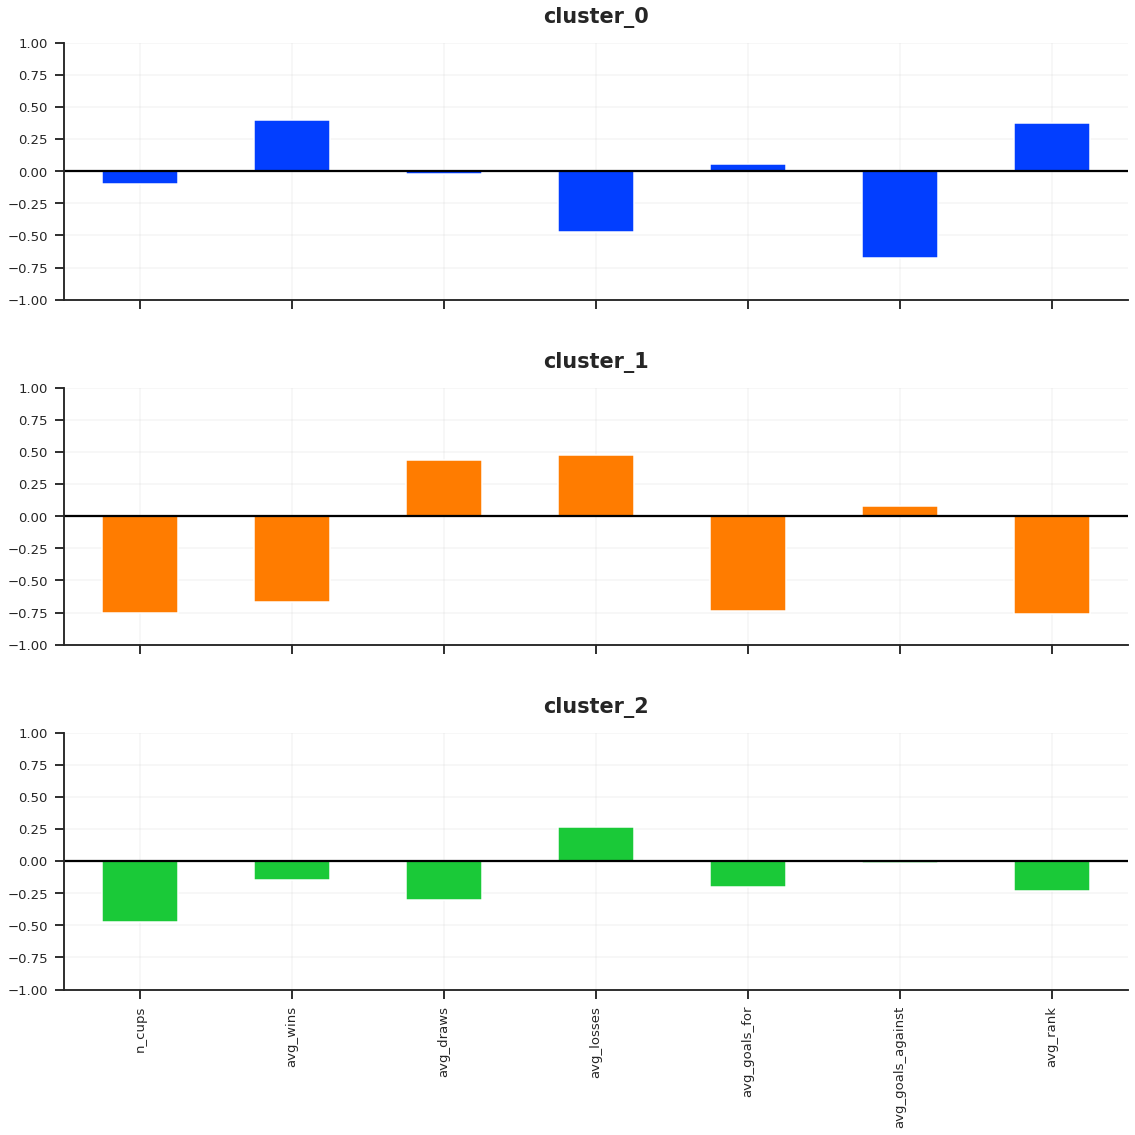

In [ ]:
# Treinando modelo e capturando clusters
model = KMeans(n_clusters=3, random_state=2023)
labels = model.fit_predict(X)

# Interpretando cluster via centroides
axes = (
  pd.DataFrame(model.cluster_centers_, columns=X.columns)
  .T
 .add_prefix('cluster_')
 .plot.bar(subplots=True, figsize=(16,16), legend=False, ylim=(-1,1))
)

for ax in axes:
  ax.axhline(y=0, color='black')

plt.tight_layout(h_pad=3)
sns.despine()
plt.show()

In [ ]:
df_teams_stats.assign(cluster=labels)

,n_cups,avg_wins,avg_draws,avg_losses,avg_goals_for,avg_goals_against,avg_rank,cluster
Team,,,,,,,,
Algeria,4,0.229167,0.229167,0.541667,0.937500,1.437500,0.318724,1
Argentina,17,0.481653,0.173950,0.344398,1.670588,1.322269,0.699798,0
Australia,5,0.116667,0.250000,0.633333,0.783333,1.966667,0.246022,1
Austria,7,0.361905,0.171429,0.466667,1.378571,1.611905,0.511454,2
Belgium,13,0.302015,0.191209,0.506777,1.356410,1.924359,0.494288,2
Brazil,21,0.626871,0.145805,0.227324,2.073016,1.079138,0.803850,0
Bulgaria,6,0.071429,0.329365,0.599206,0.599206,2.011905,0.292941,1
Cameroon,7,0.133333,0.333333,0.533333,0.723810,1.876190,0.253657,1
Chile,9,0.296296,0.222222,0.481481,1.166667,1.509259,0.494966,2
